<a href="https://colab.research.google.com/github/BrandonGordon9/AI-Homework/blob/master/Homework2Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST fashion data set

## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Exploring the format of the MNIST fashion data set

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
train_images.ndim

3

In [0]:
train_images.dtype

dtype('uint8')

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

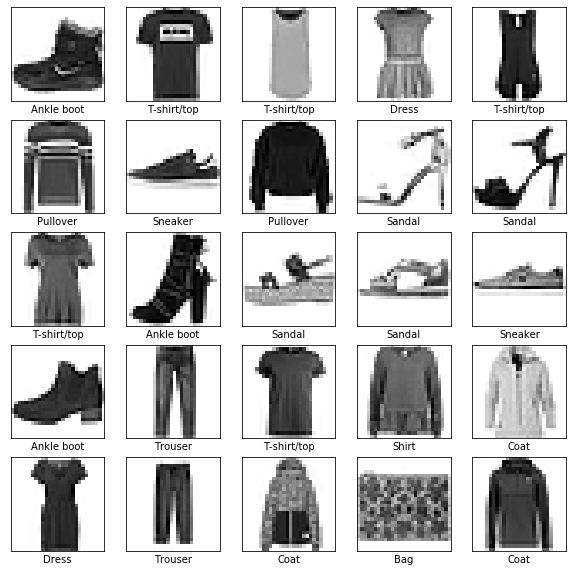

In [0]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

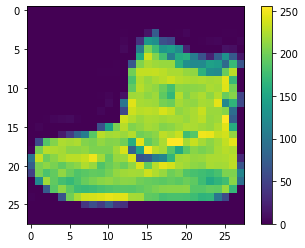

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Building a model that underfits

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1, activation=tf.nn.relu),
    keras.layers.Dense(20, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 15
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 66us/sample - loss: 2.0104 - acc: 0.2505 - val_loss: 1.7179 - val_acc: 0.2838
Epoch 2/15
60000/60000 [==============================] - 4s 61us/sample - loss: 1.6123 - acc: 0.3253 - val_loss: 1.5447 - val_acc: 0.3414
Epoch 3/15
60000/60000 [==============================] - 4s 60us/sample - loss: 1.5023 - acc: 0.3499 - val_loss: 1.4780 - val_acc: 0.3467
Epoch 4/15
60000/60000 [==============================] - 4s 62us/sample - loss: 1.4533 - acc: 0.3583 - val_loss: 1.4494 - val_acc: 0.3460
Epoch 5/15
60000/60000 [==============================] - 4s 67us/sample - loss: 1.4249 - acc: 0.3618 - val_loss: 1.4258 - val_acc: 0.3581
Epoch 6/15
60000/60000 [==============================] - 4s 73us/sample - loss: 1.4061 - acc: 0.3678 - val_loss: 1.4099 - val_acc: 0.3645
Epoch 7/15
60000/60000 [==============================] - 4s 74us/sample - loss: 1.3929 - acc: 0.3726 - val_loss: 1.

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 31us/sample - loss: 1.3440 - acc: 0.4078
Test accuracy: 0.4078


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

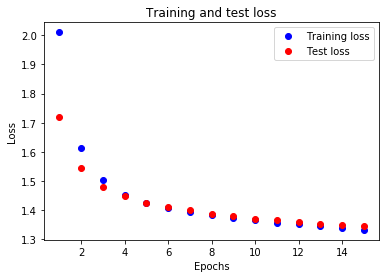

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

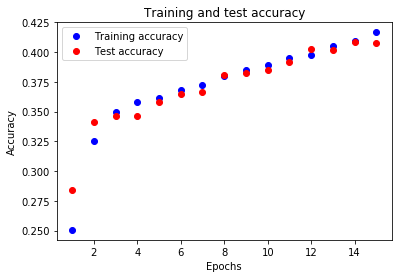

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Building a model that overfits

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(20, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 30
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 142us/sample - loss: 0.4989 - acc: 0.8250 - val_loss: 0.4203 - val_acc: 0.8480
Epoch 2/30
60000/60000 [==============================] - 8s 125us/sample - loss: 0.3741 - acc: 0.8640 - val_loss: 0.3934 - val_acc: 0.8595
Epoch 3/30
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3345 - acc: 0.8780 - val_loss: 0.3695 - val_acc: 0.8690
Epoch 4/30
60000/60000 [==============================] - 8s 128us/sample - loss: 0.3113 - acc: 0.8866 - val_loss: 0.3820 - val_acc: 0.8619
Epoch 5/30
60000/60000 [==============================] - 9s 144us/sample - loss: 0.2909 - acc: 0.8925 - val_loss: 0.3970 - val_acc: 0.8560
Epoch 6/30
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2768 - acc: 0.8971 - val_loss: 0.3423 - val_acc: 0.8780
Epoch 7/30
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2628 - acc: 0.9020 - val_l

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.3998 - acc: 0.8934
Test accuracy: 0.8934


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

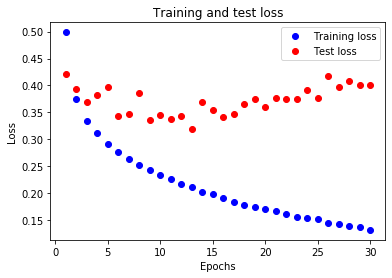

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

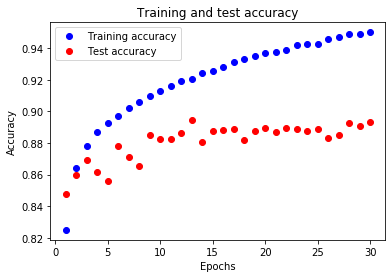

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Building a model that is good

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 73us/sample - loss: 1.3652 - acc: 0.5288 - val_loss: 1.0465 - val_acc: 0.6765
Epoch 2/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.9310 - acc: 0.7085 - val_loss: 0.8760 - val_acc: 0.7153
Epoch 3/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.8316 - acc: 0.7224 - val_loss: 0.8212 - val_acc: 0.7161
Epoch 4/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.7946 - acc: 0.7266 - val_loss: 0.8030 - val_acc: 0.7189
Epoch 5/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.7766 - acc: 0.7278 - val_loss: 0.7912 - val_acc: 0.7195
Epoch 6/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.7644 - acc: 0.7298 - val_loss: 0.7805 - val_acc: 0.7252
Epoch 7/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.7563 - acc: 0.7322 - val_loss: 0.

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.7525 - acc: 0.7357
Test accuracy: 0.7357


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

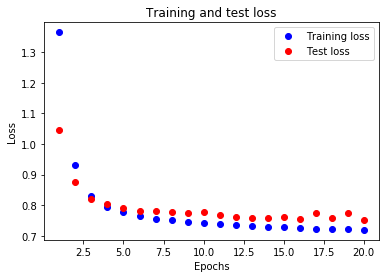

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

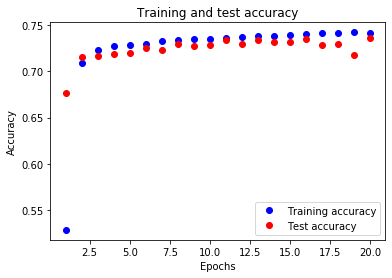

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()